# Zajęcie: Funkcje Aktywacji

Na tym zajęciu przyjrzymy się bliżej (popularnym) funkcjom aktywacji i zbadamy ich wpływ na właściwości optymalizacyjne w sieciach neuronowych.
Funkcje aktywacji są kluczową częścią modeli głębokiego uczenia się, ponieważ dodają nieliniowość do sieci neuronowych.
W literaturze istnieje wiele różnych funkcji aktywacji, a niektóre z nich są bardziej korzystne niż inne.
Celem tego zajęcie jest pokazanie, jak ważny jest wybór dobrej funkcji aktywacji (i jak to zrobić) oraz jakie problemy mogą wystąpić, jeśli tego nie zrobimy.

## Eksplorowanie funkcji aktywacji


Funkcja aktywacji, znana również jako funkcja transferu, odgrywa istotną rolę w sieciach neuronowych. Służy do wprowadzania nieliniowości w sieciach neuronowych. Jak dowiedzieliśmy się wcześniej, na wejściu stosujemy funkcję aktywacji, która jest mnożona przez wagi i dodawana do odchylenia, czyli $f(z)$ , 

gdzie z = (wejście * wagi) + obciążenie 

i $f(\cdot)$ to funkcja aktywacji. 

Jeśli nie zastosujemy funkcji aktywacji, to neuron po prostu przypomina regresję liniową. Celem funkcji aktywacji jest wprowadzenie transformacji nieliniowej w celu poznania złożonych wzorców leżących u podstaw danych.

Przyjrzyjmy się teraz niektórym z interesujących, często używanych funkcji aktywacji.

<h1 class="mt-5 text-left">Funkcje aktywacji i ich gradienty</h1>
       
<p>Funkcje aktywacji są ostatnim etapem działania sztucznego neuronu i to na podstawie tych funkcji sztuczne sieci neuronowe mogą nauczyć się wyrażać funkcje nieliniowe. Wszystkie te funkcje odwzorowują „ukrytą” wartość neuronu na wyjściu, więc dla pojedynczego sztucznego neuronu mapują:</p>
        <div class="mt-5 text-center">
            <p>$f: \mathbb{R} \rightarrow \mathbb{R}$</p>
        </div>
        <p>Ponieważ jednak możemy wyrazić sztuczne sieci neuronowe jako algebrę liniową, w której wagi i odchylenia są macierzami i wektorami, zamiast tego uważamy, że funkcja aktywacji jest stała w całej warstwie i dlatego jest stosowana do każdej „ukrytej” wartości każdego sztucznego neuronu w tej warstwie . Zamiast tego stosujemy funkcję aktywacji do wektora, który odwzorowuje:</p>
        <div class="mt-5 text-center">
            <p>$f: \mathbb{R}^i \rightarrow \mathbb{R}^o$</p>
        </div>
        <p>gdzie $i$ jest wymiarem wektora wejściowego, a $o$ jest wymiarem wektora wyjściowego. Kiedy użyjemy tych funkcji do zaimplementowania warstwy w sztucznej sieci neuronowej, dla funkcji aktywacji $f$ obliczymy:</p>
        <div class="mt-5 text-center">
            <p>$A = f(\textbf{X}\cdot\textbf{W}+\textbf{b})$</p>
        </div>
        <p>Gdzie $\textbf{X}$ to dane wejściowe warstwy, $\textbf{W}$ i $\textbf{b}$ to parametry warstwy. Stąd możemy dalej podzielić funkcje aktywacji na dwa typy: $\textbf{funkcje niezależne od elementów}$ i $\textbf{funkcje zależne od elementów}$, które mają różne właściwości. Poniżej omówimy niektóre popularne funkcje aktywacji, ich gradienty i ich implementacje numpy.</p>


<h2 class="mt-5 text-left">Funkcje niezależne względem elementów </h2>
        <p>Funkcje niezależne względem elementów są stosowane niezależnie do każdego elementu wektora wejściowego. Dokładniej, jeśli mamy funkcję $f$ i wektor $\textbf{x} = \{x_1, x_2, \dots, x_n\}$, obliczamy $f(\textbf{x}) = \{f (x_1), f(x_2), \dots, f(x_n)\}$. Ma to znaczenie przy obliczaniu gradientu naszej funkcji aktywacji względem wektora wejściowego $\textbf{x}$. Jak więc obliczyć gradienty niezależnych funkcji aktywacji elementarnej? Cóż, technicznie rzecz biorąc, musimy obliczyć macierz jakobianu, która oblicza pochodną cząstkową każdej zmiennej wejściowej i każdej zmiennej wyjściowej. Dla wektora wejściowego $\textbf{x} = \{x_1, x_2, \dots, x_n\}$ i wektora wyjściowego $f(\textbf{a}) = \{a_1, a_2, \dots, a_n\}$ , jakobianowa $\textbf{J}$ będzie macierzą $n \times n$ i będzie wyglądać następująco:</p>
        
$$J = \begin{bmatrix}
                \frac{\partial a_{1}}{\partial x_{1}}  & \frac{\partial a_{2}}{\partial x_{1}}     & \dots     & \frac{\partial a_{n}}{\partial x_{1}}    \\
                \frac{\partial a_{1}}{\partial x_{2}}  & \frac{\partial a_{2}}{\partial x_{2}}     & \dots     & \frac{\partial a_{n}}{\partial x_{2}}    \\
                \vdots  & \vdots    & \ddots    & \vdots    \\
                \frac{\partial a_{1}}{\partial x_{n}}  & \frac{\partial a_{2}}{\partial x_{n}}    & \dots     & \frac{\partial a_{n}}{\partial x_{n}}    \\ 
        \end{bmatrix}$$

   <p>Powodem, dla którego oddzielamy funkcje niezależne od elementu zależnego od elementu, jest znacząca optymalizacja, jaką możemy wykonać dla tego Jakobianu. Ponieważ mówimy o elementarnych funkcjach $\textit{niezależnych}$, wiemy, że $a_i$ jest zależne tylko od $x_i$, ponieważ $a_i = f(x_i)$ i jest niezależne od wszystkich innych elementów wektora wejściowego $ \textbf{x}$. Dlatego każdy wyraz $\frac{\partial a_i}{\partial x_j}$, gdzie $i \ne j$ wynosi 0. Nasz jakobian to $\textit{sparse}$, konkretnie przekątna $\textbf{J}$ to jedyne wyrazy, które mogą być niezerowe:</p>

  $$J = \begin{bmatrix}
                \frac{\partial a_{1}}{\partial x_{1}}  & 0     & \dots     & 0    \\
                0  & \frac{\partial a_{2}}{\partial x_{2}}     & \dots     & 0    \\
                \vdots  & \vdots    & \ddots    & \vdots    \\
                0  & 0    & \dots     & \frac{\partial a_{n}}{\partial x_{n}}    \\ 
        \end{bmatrix}$$

   <p>Powodem, dla którego jest to ogromna optymalizacja, jest to, w jaki sposób zamierzamy użyć tej macierzy Jakobianu. Chcemy obliczyć trzy gradienty warstwy: $\frac{\partial f(\textbf{X}\cdot \textbf{W} + \textbf{b})}{\partial \textbf{X}}, \frac{\partial f(\textbf{X}\cdot \textbf{W} + \textbf{b})}{\partial \textbf{W}},$ i $\frac {\partial f(\textbf{X }\cdot \textbf{W} + \textbf{b})}{\partial \textbf{b}}$. Możemy tutaj użyć reguły łańcuchowej, aby przepisać niektóre terminy i ułatwić radzenie sobie z nimi:</p>
            $$\begin{eqnarray}
                Z &=& \textbf{X}\cdot\textbf{W}+\textbf{b}\\
                A &=& f(\textbf{Z})
             \end{eqnarray}$$

<p>Ok, więc teraz szukamy trzech gradientów:</p>
            $$\begin{eqnarray}
                \frac{\partial f(\textbf{Z})}{\partial \textbf{X}} &=& \frac{\partial f(\textbf{Z})}{\partial \textbf{Z}}\frac{\partial \textbf{Z}}{\partial \textbf{X}} &=& \textbf{J}\frac{\partial \textbf{Z}}{\partial \textbf{X}}\\
                \frac{\partial f(\textbf{Z})}{\partial \textbf{W}} &=& \frac{\partial f(\textbf{Z})}{\partial \textbf{Z}}\frac{\partial \textbf{Z}}{\partial \textbf{W}} &=& \textbf{J}\frac{\partial \textbf{Z}}{\partial \textbf{W}}\\
                \frac{\partial f(\textbf{Z})}{\partial \textbf{b}} &=& \frac{\partial f(\textbf{Z})}{\partial \textbf{Z}}\frac{\partial \textbf{Z}}{\partial \textbf{b}} &=& \textbf{J}\frac{\partial \textbf{Z}}{\partial \textbf{b}}
            \end{eqnarray}$$

<p>Widzimy więc, że będziemy musieli użyć tutaj mnożenia macierzy. Możemy zredukować to mnożenie macierzy do mnożenia elementów, jeśli wiemy, że $\textbf{J}$ jest rzadki i zawiera tylko gradient wzdłuż przekątnej. Ta optymalizacja pozwoli nam zaoszczędzić mnóstwo czasu, zwłaszcza w miarę wzrostu przestrzeni parametrów i przestrzeni funkcji naszych modeli.</p>

<p>Zdefiniujmy kilka popularnych funkcji niezależnych od elementu i pokażmy ich implementacje numpy. Ponieważ są to funkcje niezależne od elementu, kiedy je definiujemy, będziemy o nich mówić przy danych wejściowych skalarnych zamiast wejściowych wektorowych. Pamiętaj tylko, że kiedy zastosujemy je do wektorów, zastosujemy tę funkcję do każdego elementu wektora wejściowego.</p>


In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Funkcja sigmoidalna (logistyczna)

Funkcja sigmoidalna jest jedną z najczęściej używanych funkcji aktywacji. Skaluje wartość od 0 do 1. Funkcję sigmoidalną można zdefiniować w następujący sposób:



$$f(x)=\frac{1}{1+e^{-x}}$$

Jest to krzywa w kształcie litery S, jak pokazano poniżej.


Jest różniczkowalna, co oznacza, że możemy znaleźć nachylenie krzywej w dowolnych dwóch punktach. Jest monotoniczny, co oznacza, że albo całkowicie nie rośnie, albo nie maleje. Funkcja sigmoidalna jest również znana jako funkcja logistyczna. Ponieważ wiemy, że prawdopodobieństwo leży między 0 a 1, a ponieważ funkcja sigmoidalna zgniata wartość między 0 a 1, jest używana do przewidywania prawdopodobieństwa wyjścia.
Funkcję sigmoidalną można zdefiniować w Pythonie w następujący sposób:


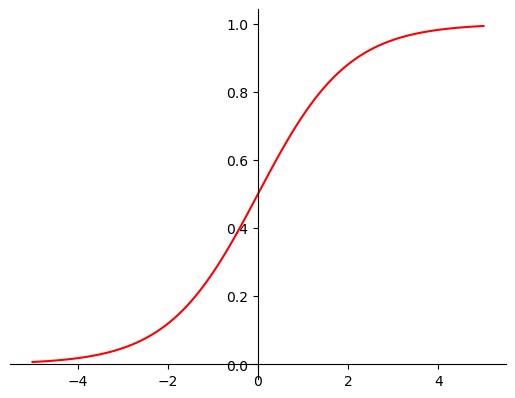

In [3]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = sigmoid(x) here
y = sigmoid(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

## Funkcja tanh

Funkcja tangensa hiperbolicznego (tanh) wyprowadza wartość z przedziału od -1 do +1 i jest wyrażona
następująco:
    
$$f(x)=\frac{1-e^{-2 x}}{1+e^{-2 x}} $$
    
Przypomina również krzywą w kształcie litery S. W przeciwieństwie do funkcji sigmoidalnej, która jest wyśrodkowana na 0,5,
funkcja tanh jest wyśrodkowana w punkcie 0, jak pokazano na poniższym wykresie.
    

    
Podobnie jak funkcja sigmoidalna, jest to również funkcja różniczkowalna i monotoniczna. tan
funkcja jest realizowana w następujący sposób:
    
    

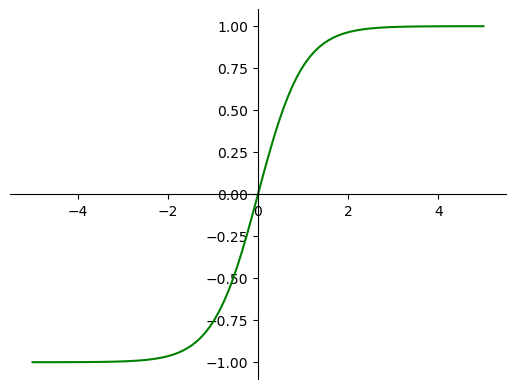

In [4]:
def tanh(x):
    numerator = 1-np.exp(-2*x)
    denominator = 1+np.exp(-2*x)
    return numerator/denominator

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = tanh(x) here
y = tanh(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

## Funkcja rektyfikowanej jednostki liniowej

Funkcja Rectified Linear Unit (ReLU) to kolejna z najczęściej używanych funkcji aktywacji. Wyprowadza wartość od o do nieskończoności. Zasadniczo jest to funkcja fragmentaryczna i można ją wyrazić w następujący sposób:
    

$$ f(x)=\left\{\begin{array}{ll}{0} & {\text { for } x<0} \\ {x} & {\text { for } x \geq 0} \end{array}\right.$$
               
               
Oznacza to, że $f(x)$ zwraca zero, gdy wartość x jest mniejsza od zera, a $f(x)$ zwraca x, gdy wartość x jest większa lub równa zeru. Można to również wyrazić w następujący sposób:

$$ f(x)=\max (0, x)$$

Funkcję ReLU pokazano na poniższym rysunku.

Jak widać na powyższym diagramie, kiedy podajemy ujemne dane wejściowe do funkcji ReLU, konwertuje ona je na zero. Szkopuł w zerowaniu dla wszystkich wartości ujemnych to problem zwany umieraniem ReLU, a neuron jest martwy, jeśli zawsze wysyła zero. Funkcję ReLU można zaimplementować w następujący sposób:


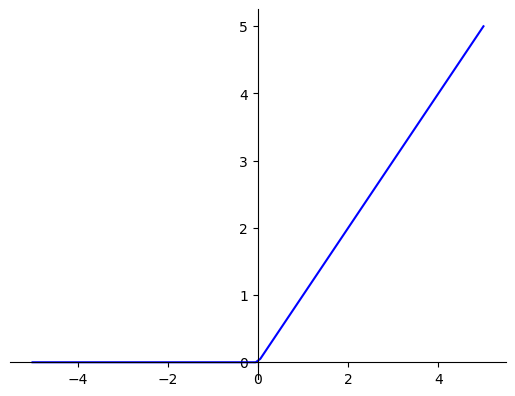

In [5]:
def ReLU(x):
    return np.maximum(0, x)
    
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)    
    
# the function, which is y = ReLU(x) here
y = ReLU(x)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()

## Nieszczelna funkcja ReLU

Leaky ReLU to wariant funkcji ReLU, który rozwiązuje umierający problem ReLU. Zamiast konwertować każde ujemne wejście na zero, ma małe nachylenie dla wartości ujemnej, jak pokazano poniżej.

Nieszczelny ReLU można wyrazić w następujący sposób:

$$ f(x)=\left\{\begin{array}{ll}{\alpha x} & {\text { for } x<0} \\ {x} & {\text { for } x \geq 0}\end{array}\right.$$



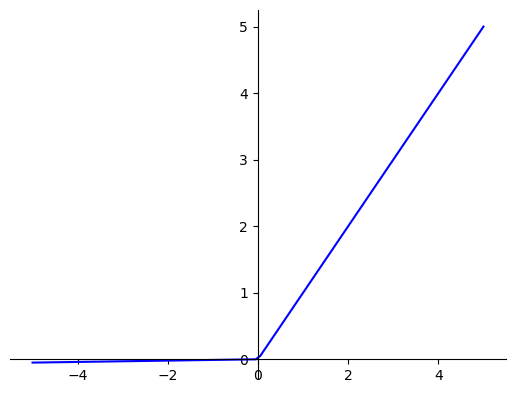

In [6]:
def leakyReLU(x,alpha):
    return np.maximum(alpha*x,x)
    
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)    
    
# the function, which is y = leakyReLU(x) here
y = leakyReLU(x,0.01)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()



 Wartość $\alpha$ of jest zazwyczaj ustawiona na 0,01. Nieszczelna funkcja ReLU jest zaimplementowana w następujący sposób:
Zamiast ustawiać jakieś wartości domyślne na $\alpha$, możemy wysłać je jako parametr do sieci neuronowej i sprawić, by sieć poznała optymalną wartość $\alpha$. Taką funkcję aktywacji można nazwać funkcją parametryczną ReLU. Możemy również ustawić wartość $\alpha$ na jakąś losową wartość i nazywa się to funkcją Randomized ReLU.

## Wykładnicza funkcja jednostki liniowej

Wykładnicza jednostka liniowa (ELU), podobnie jak Leaky ReLU, ma małe nachylenie dla wartości ujemnych. Ale zamiast linii prostej ma krzywą logarytmiczną, jak pokazano na poniższym diagramie.

    
Można to wyrazić w następujący sposób:
    
$$ f(x)=\left\{\begin{array}{ll}{\alpha\left(e^{x}-1\right)} & {\text { for } x<0} \\ { x} & {\text { for } x \geq 0}\end{array}\right.$$
Funkcja ELU jest zaimplementowana w Pythonie w następujący sposób:


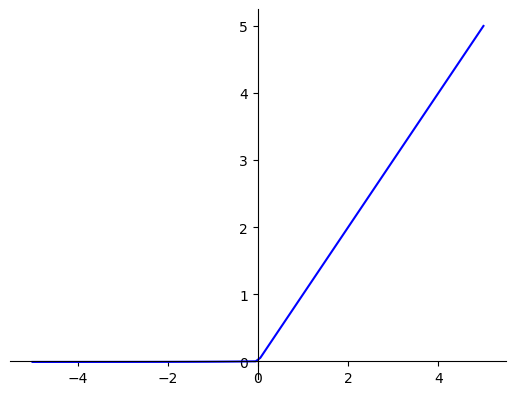

In [7]:
def ELU(x,alpha=0.01):
    return np.maximum(alpha*(np.exp(x)-1),x)
    
# 100 linearly spaced numbers
x = np.linspace(-5,5,100)    
    
# the function, which is y = leakyReLU(x) here
y = ELU(x,0.01)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'b')

# show the plot
plt.show()

## Funkcja Swish
Funkcja Swish to niedawno wprowadzona przez Google funkcja aktywacji. W przeciwieństwie do innych funkcji aktywacji, które są monotoniczne, Swish jest funkcją niemonotoniczną, co oznacza, że nie zawsze jest nierosnąca ani nie malejąca. Zapewnia lepszą wydajność niż ReLU. Jest to proste i można je wyrazić następująco:
    

$$f(x)=x \sigma(x)$$

Tutaj $\sigma(x)$ jest funkcją sigmoidalną. Funkcja Swish jest przedstawiona na poniższym diagramie.
    
    
Możemy również ponownie sparametryzować funkcję Swish i wyrazić ją w następujący sposób:
    
$$f(x)=2 x \sigma(\beta x)$$


Gdy wartość $\beta$ wynosi 0, to otrzymujemy funkcję tożsamościową $f(x) = x$.
Staje się funkcją liniową i kiedy wartość $\beta$ dąży do nieskończoności, wtedy $f(x)$ staje się $2max (0, x)$, co jest w zasadzie funkcją ReLU pomnożoną przez pewną stałą wartość. Tak więc wartość $\beta$ działa jako dobra interpolacja między funkcją liniową i nieliniową. Funkcję swish można zaimplementować w sposób pokazany poniżej.

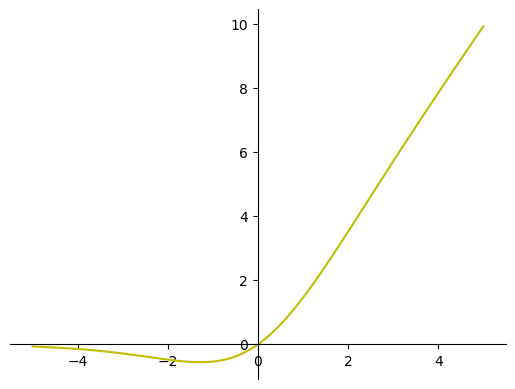

In [8]:
def swish(x,beta):
    return 2*x*sigmoid(beta*x)

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)    
    
# the function, which is y = leakyReLU(x) here
y = swish(x,1)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'y')

# show the plot
plt.show()

<h2 class="mt-5 text-left">Funkcje zależne od elementu</h2>

<p>Funkcje zależne elementarnie składają się z klasy funkcji, w których każda wartość w wektorze wyjściowym $\textbf{a} = \{a_1, a_2, \dots, a_n\}$ jest funkcją wielu wartości w wektorze wejściowym $\textbf{x} = \{x_1, x_2, \kropki, x_n\}$. Niestety, w tej klasie funkcji jakobian $\textbf{J}$ nie jest macierzą diagonalną i musimy wykonać pełne mnożenie macierzy zamiast optymalizacji mnożenia elementów. Istnieje tylko kilka funkcji aktywacji zależnych od elementów, ale omówimy tylko te najpopularniejsze.</p>

  <h4 class="mt-5 text-left">Softmax</h4>
           <p>Softmax to jedna z najważniejszych funkcji aktywacyjnych. Zaczniemy od definicji, a następnie wyjaśnimy, dlaczego:</p>
                    $$softmax(\textbf{x}) = \{\frac{e^{sx_1}}{\sum\limits_{k=1}^{n} e^{sx_k}}, \frac{e^{sx_2}}{\sum\limits_{k=1}^{n} e^{sx_k}}, \dots, \frac{e^{sx_n}}{\sum\limits_{k=1}^{n} e^{sx_k}}\}$$

  <p>Ok, jest tu dużo do rozpakowania. $softmax(\textbf{x})$ jest zdefiniowany tylko dla operacji na wektorach, nie może przyjąć skalarnego wejścia. $Softmax(\textbf{x})$ konwertuje wektor wejściowy $\textbf{x}$ z elementami $n$ na rozkład prawdopodobieństwa z elementami $n$. Potęgując każdy składnik w wektorze wejściowym, $softmax$ gwarantuje, że każdy składnik będzie dodatni. Sumując wszystkie potęgowane elementy i dzieląc przez tę sumę, $softmax$ oblicza rozkład prawdopodobieństwa, przypisując każdemu elementowi w wektorze wyjściowym wartość procentową, jaką element wejściowy przyczynił się do sumy. Zmienna $s$ jest tylko parametrem rozciągania, kontroluje wariancję rozkładu lub sposób „rozłożenia” rozkładu.</p>

   <p>Należy tutaj zauważyć, że te prawdopodobieństwa $\textbf{nie}$ są wartościami ufności. Jeśli wartość na pozycji 1 w rozkładzie danych wyjściowych wynosi 0,95, oznacza to, że model jest w 95% pewny swojego wyboru. Wyjaśnimy, dlaczego później, gdy będziemy mówić o myśleniu bayesowskim, ale krótka odpowiedź jest taka, że $softmax$ daje rozkład prawdopodobieństwa zgodnie z pojedynczą kombinacją parametrów, aby zmierzyć prawdziwą pewność, musielibyśmy rozważyć rozkład parametrów. Ponownie, więcej na ten temat później.</p>

   <p>Ponieważ $softmax$ nie jest elementarnie niezależny, musimy obliczyć każdy element macierzy Jakobiana $\textbf{J}$. Dlatego zacznijmy obliczenia od wzoru na pojedynczy element $\textbf{J}$ (pozycja wyjściowa $i$ i pozycja wejściowa $j$):</p>
                $$\begin{eqnarray}
                    \frac{d softmax_i(\textbf{x})}{dx_j} &=& \frac{d\frac{e^{sx_i}}{\sum\limits_{k=1}^{n} e^{sx_k}}}{dx_j}\\
                    &=& \frac{(\sum\limits_{k=1}^{n} e^{sx_k})\frac{d e^{sx_i}}{dx_j} - e^{sx_i}\frac{d\sum\limits_{k=1}^{n} e^{sx_k}}{dx_j}}{(\sum\limits_{k=1}^{n} e^{sx_k})^2}\\
                    &=& \frac{\frac{de^{sx_i}}{dx_j}}{\sum\limits_{k=1}^{n} e^{sx_k}} - \frac{e^{sx_i}se^{sx_j}}{(\sum\limits_{k=1}^{n} e^{sx_k})^2}
                  \end{eqnarray}$$
   <p>To jest tak daleko, jak możemy się posunąć, nie znając relacji między $i$ i $j$. Jeśli $i == j$, to:</p>
   $$\begin{eqnarray}
                    &=& \frac{se^{sx_j}}{\sum\limits_{k=1}^{n} e^{sx_k}} - s(\frac{e^{sx_j}}{\sum\limits_{k=1}^{n} e^{sx_k}})^2\\
                    &=& s*softmax_i(\textbf{x})*(1-softmax_i(\textbf{x}))
                  \end{eqnarray}$$

   <p>If $i \ne j$:</p>
                $$\begin{eqnarray}
                    &=& 0 - s\frac{e^{sx_i}e^{sx_j}}{(\sum\limits_{k=1}^{n} e^{sx_k})^2}\\
                    &=& s*softmax_i(\textbf{x})*softmax_j(\textbf{x})
                  \end{eqnarray}$$

   <p>Możemy połączyć te dwa wyrażenia, aby utworzyć wyrażenie fragmentaryczne:</p>
                $$\frac{d softmax_i(\textbf{x})}{dx_j} = \begin{cases}
                        s*softmax_i(\textbf{x})*(1-softmax_i(\textbf{x}))   & i==j\\
                        s*softmax_i(\textbf{x})*softmax_j(\textbf{x})       & otherwise
                              \end{cases}$$
   <p>Śledzenie tego jest irytujące, więc matematycy wymyślili funkcję delta Kroneckera. Delta Kroneckera to zwarty sposób zapisu:</p>
                $$\delta_{ij} = \begin{cases}
                        1   & i==j\\
                        0   & otherwise
                                \end{cases}$$
   <p>Możemy użyć delty Kroneckera do skompresowania naszego elementu gradientu $softmax$:</p>
                $$\frac{d softmax_i(\textbf{x})}{dx_j} = s*softmax_i(\textbf{x})*(\delta_{ij}-softmax_j(\textbf{x}))$$

  <p>Ok, teraz zaimplementujmy to. Warto wspomnieć o kilku szczegółach implementacji. Po pierwsze, $softmax$ nie jest bardzo stabilny liczbowo dla maszyn w swoim obecnym sformułowaniu. Dzieje się tak, ponieważ ryzykujemy przepełnienie z naprawdę dużych wartości. Tak więc jednym ze sposobów uczynienia tego bardziej stabilnym liczbowo jest odjęcie maksymalnej wartości $\textbf{x}$ od każdego elementu w $\textbf{x}$. To odejmowanie usunie wartości odstające, które mogą się przepełnić, a $e^{x}$, gdzie $x$ jest dużą liczbą ujemną, jest stabilne. Dodatkowo, jeśli zachowamy to odejmowanie w mianowniku, nie wpłynie to na wynikowy rozkład prawdopodobieństwa:
                $$\begin{eqnarray}
                    softmax_i(\textbf{x}) &=& \frac{e^{s(x_i-max(\textbf{x}))}}{\sum\limits_{k=1}^{n} e^{s(x_k - max(\textbf{x}))}}\\
                    &=& \frac{e^{sx_i}e^{s*max(\textbf{x})}}{\sum\limits_{k=1}^{n} e^{sx_k}e^{s*max(\textbf{x})}}\\
                    &=& \frac{e^{sx_i}e^{s*max(\textbf{x})}}{e^{s*max(\textbf{x})} \sum\limits_{k=1}^{n} e^{sx_k}}\\
                    &=& \frac{e^{sx_i}}{\sum\limits_{k=1}^{n} e^{sx_k}}
                  \end{eqnarray}$$

## Funkcja softmax


Funkcja softmax jest w zasadzie uogólnieniem funkcji sigmoidalnej. Zwykle stosuje się ją do ostatniej warstwy sieci i podczas wykonywania zadań klasyfikacji wieloklasowej. Daje prawdopodobieństwo każdej klasy wyjścia, a zatem suma wartości softmax zawsze będzie równa 1.

Można to przedstawić w następujący sposób:
$$f\left(x_{i}\right)=\frac{e^{x_{i}}}{\sum_{j} e^{x_{j}}}$$

Jak pokazano na poniższym wykresie, funkcja softmax przekształca dane wejściowe na prawdopodobieństwa:
    
    
Funkcję softmax można zaimplementować w Pythonie w następujący sposób:

In [9]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)


wektor = (1,3,6)

sm=softmax(wektor)

print(sm)

print(sum(sm))

[0.00637746 0.04712342 0.94649912]
1.0


# Gradienty funkcji

Gradient to podstawowe narzędzie rachunku różniczkowego funkcji wielu zmiennych. Jest to uogólnienie pojęcia pochodnej, które pozwala opisać, w jaki sposób zmienia się wartość funkcji względem zmian jej argumentów.


## Funkcja skalarna jednej zmiennej

Dla funkcji jednej zmiennej rzeczywistej $ f: \mathbb{R} \to \mathbb{R} $, gradient pokrywa się z klasyczną pochodną:
\[
\nabla f(x) = \frac{df}{dx}
\]

\subsection{Funkcja skalarna wielu zmiennych}

Dla funkcji $ f: \mathbb{R}^n \to \mathbb{R} $, gradient to wektor pochodnych cząstkowych względem każdej zmiennej:
\[
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
\]

## Funkcja skalarna od macierzy

Jeśli funkcja $ f: \mathbb{R}^{m \times n} \to \mathbb{R} $, gradient względem macierzy $ X $ jest również macierzą:
$$
(\nabla f(X))_{ij} = \frac{\partial f}{\partial X_{ij}}
$$

Każdy element gradientu to pochodna cząstkowa względem odpowiedniego elementu macierzy wejściowej.


## Macierz Jacobiego

Dla funkcji wektorowej $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^m$, gdzie:
$ \mathbf{f}(\mathbf{x}) = \begin{bmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \\ \vdots \\ f_m(\mathbf{x}) \end{bmatrix} $,
macierz Jacobiego ma postać:
$ J(\mathbf{f})(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix} $

Macierz ta opisuje liniową aproksymację funkcji wektorowej oraz lokalną zmianę wartości wyjściowej względem zmiennych wejściowych.

## Macierz Hessego (Hessjan)

Hessjan to macierz drugich pochodnych cząstkowych funkcji skalarnej:  
$ f: \mathbb{R}^n \to \mathbb{R} $  
$ H(f)(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix} $

Hessjan pozwala analizować krzywiznę funkcji i klasyfikować punkty stacjonarne:

    -- dodatnio określony Hessjan $\Rightarrow$ minimum lokalne,
    -- ujemnie określony Hessjan $\Rightarrow$ maksimum lokalne,
    -- nieokreślony Hessjan $\Rightarrow$ punkt siodłowy.


\subsection{Gradienty i Hessjany w optymalizacji}

Gradienty i Hessjany są kluczowymi składnikami metod optymalizacyjnych:

### Metoda gradientu prostego (gradient descent):
$ x_{k+1} = x_k - \alpha \nabla f(x_k) $

### Metoda Newtona:
$ x_{k+1} = x_k - H^{-1}(x_k) \nabla f(x_k) $

Gdzie $ \alpha > 0 $ to współczynnik uczenia (krok optymalizacji). W praktyce często stosuje się przybliżenia Hessjana, np. w metodach quasi-Newtona (BFGS, L-BFGS).

### Zastosowania praktyczne

Gradienty i Hessjany mają szerokie zastosowanie w:

    -- uczeniu maszynowym (optymalizacja funkcji kosztu),
    -- wizji komputerowej (segmentacja, klasyfikacja),
    -- ekonomii (modele regresji i maksymalizacji zysku),
    -- fizyce (modelowanie energii i układów dynamicznych).



### Wizualizacja optymalizacji: gradient vs. Newton

Rozważmy funkcję kwadratową:
$$
f(x) = x^2 + 4
$$
która ma minimum globalne w punkcie $x = 0$. Jej pochodna i druga pochodna wynoszą odpowiednio:
$$
f'(x) = 2x, \quad f''(x) = 2
$$

Celem jest porównanie dwóch metod optymalizacji:

#### Metoda gradientu prostego (Gradient Descent):
Algorytm iteracyjnie aktualizuje punkt $x_k$ według reguły:
$$
x_{k+1} = x_k - \alpha \cdot f'(x_k)
$$
gdzie $\alpha > 0$ to stały krok (współczynnik uczenia). Metoda ta wykonuje postępy w kierunku przeciwnym do gradientu i jest stosunkowo prosta, ale może wymagać wielu kroków, zwłaszcza przy małej wartości $\alpha$.

#### Metoda Newtona:
Metoda Newtona korzysta z drugiej pochodnej w celu szybszego znalezienia minimum. Aktualizacja przebiega według wzoru:
$$
x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)}
$$
Dzięki wykorzystaniu informacji o krzywiźnie funkcji, zbieżność do minimum jest znacznie szybsza (zbieżność kwadratowa), zwłaszcza w pobliżu ekstremum.

#### Wizualizacja:
Na wykresie funkcji $f(x)$ przedstawiono ścieżki iteracyjne dla obu metod optymalizacji, rozpoczynając od tego samego punktu startowego $x_0 = 4$. Widać wyraźnie, że metoda Newtona osiąga minimum w znacznie mniejszej liczbie iteracji, podczas gdy metoda gradientowa wykonuje wolniejsze zejście w kierunku minimum.



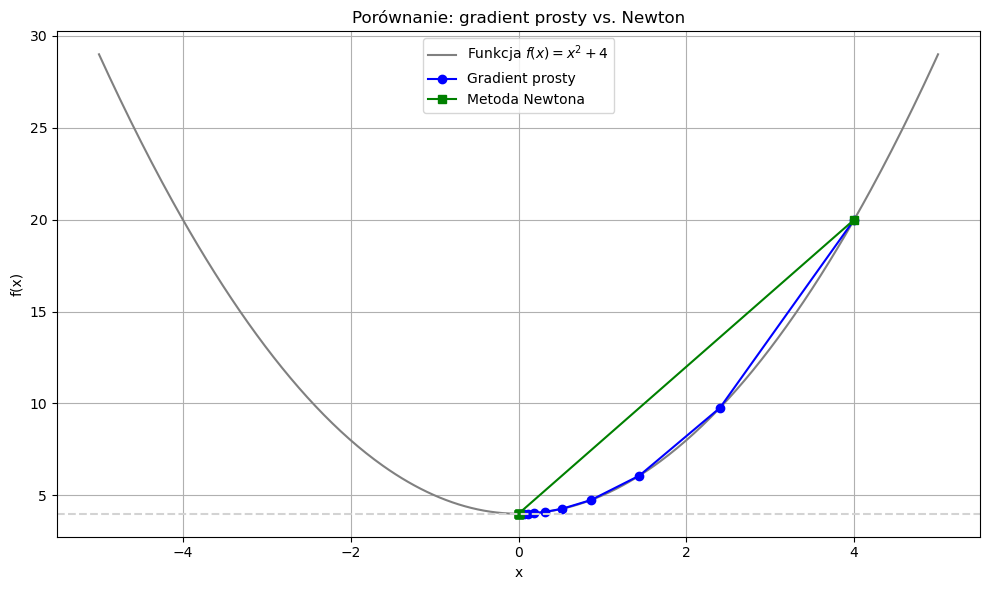

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja celu i jej pochodne
def f(x):
    return x**2 + 4

def grad_f(x):
    return 2*x

def hess_f(x):
    return 2  # Stała druga pochodna

# Parametry
x0 = 4.0                # punkt startowy
alpha = 0.2             # współczynnik uczenia (dla gradientu)
n_iter = 8              # liczba iteracji

# Listy do przechowywania ścieżek
x_gd = [x0]
x_newton = [x0]

# Optymalizacja: Gradient prosty
x = x0
for _ in range(n_iter):
    x = x - alpha * grad_f(x)
    x_gd.append(x)

# Optymalizacja: Newton
x = x0
for _ in range(n_iter):
    x = x - grad_f(x) / hess_f(x)
    x_newton.append(x)

# Przygotowanie wykresu
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Funkcja $f(x) = x^2 + 4$', color='gray')
plt.plot(x_gd, [f(x) for x in x_gd], 'o-', label='Gradient prosty', color='blue')
plt.plot(x_newton, [f(x) for x in x_newton], 's-', label='Metoda Newtona', color='green')
plt.axhline(y=4, color='lightgray', linestyle='--')
plt.title("Porównanie: gradient prosty vs. Newton")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


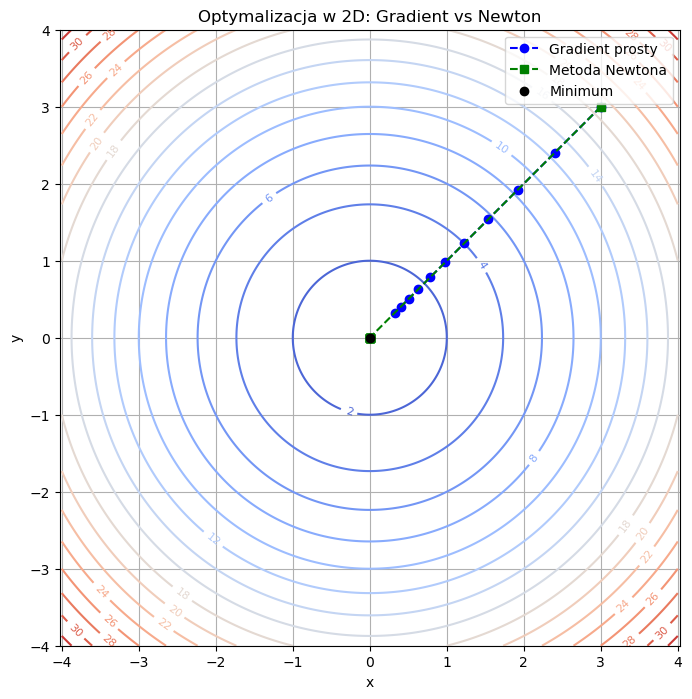

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcja celu: f(x, y) = x^2 + y^2 + 1
def f(x):
    return x[0]**2 + x[1]**2 + 1

# Gradient: ∇f(x, y) = [2x, 2y]
def grad_f(x):
    return np.array([2*x[0], 2*x[1]])

# Hessjan: stała macierz 2x2
def hess_f(x):
    return np.array([[2, 0],
                     [0, 2]])

# Parametry
x0 = np.array([3.0, 3.0])  # punkt początkowy
alpha = 0.1                # krok gradientowy
n_iter = 10                # liczba iteracji

# Ścieżki optymalizacji
path_grad = [x0.copy()]
path_newton = [x0.copy()]

# Gradient descent
x = x0.copy()
for _ in range(n_iter):
    x = x - alpha * grad_f(x)
    path_grad.append(x.copy())

# Newton's method
x = x0.copy()
for _ in range(n_iter):
    hess_inv = np.linalg.inv(hess_f(x))
    x = x - hess_inv @ grad_f(x)
    path_newton.append(x.copy())

# Konwersja ścieżek do tablic
path_grad = np.array(path_grad)
path_newton = np.array(path_newton)

# Przygotowanie siatki do konturów
x_vals = np.linspace(-4, 4, 400)
y_vals = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2 + 1

# Wykres
plt.figure(figsize=(8, 8))
contours = plt.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.clabel(contours, inline=True, fontsize=8)

# Trajektorie
plt.plot(path_grad[:, 0], path_grad[:, 1], 'o--', label='Gradient prosty', color='blue')
plt.plot(path_newton[:, 0], path_newton[:, 1], 's--', label='Metoda Newtona', color='green')
plt.scatter(0, 0, color='black', label='Minimum', zorder=5)
plt.title("Optymalizacja w 2D: Gradient vs Newton")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
